<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2023 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [4]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

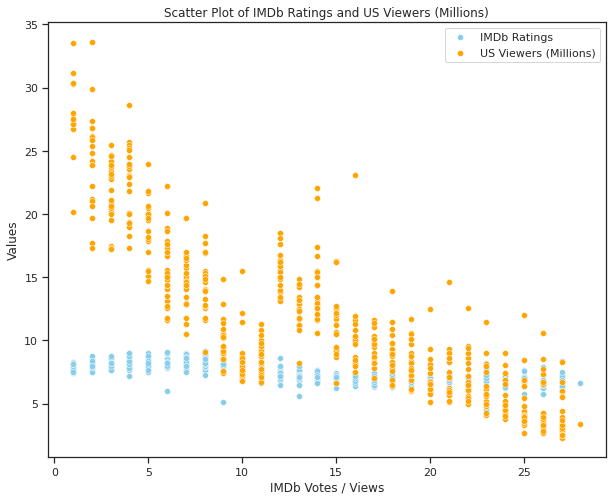

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='season', y='imdb_rating', data=episodes, color='skyblue', label='IMDb Ratings')
sns.scatterplot(x='season', y='us_viewers_in_millions', data=episodes, color='orange', label='US Viewers (Millions)')
plt.title('Scatter Plot of IMDb Ratings and US Viewers (Millions)')
plt.xlabel('IMDb Votes / Views')
plt.ylabel('Values')
plt.show()

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

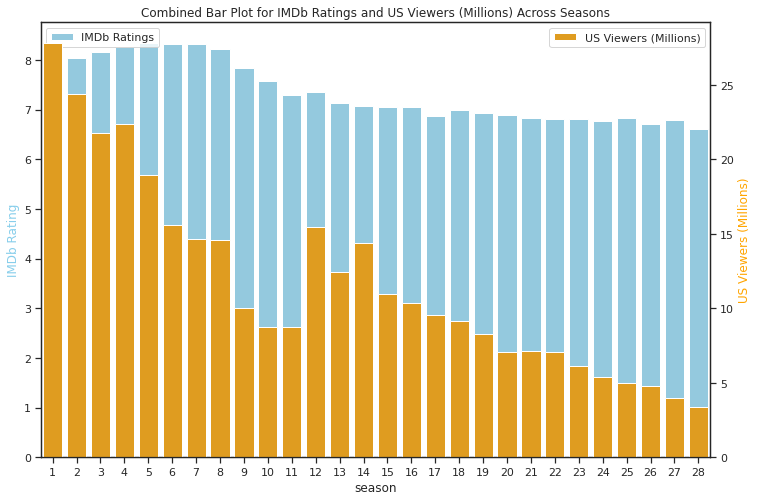

In [50]:
# barplot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for IMDb ratings
sns.barplot(x='season', y='imdb_rating', data=episodes, ci=None, color='skyblue', label='IMDb Ratings', ax=ax1)

# Create a second y-axis to plot US viewers in millions
ax2 = ax1.twinx()
sns.barplot(x='season', y='us_viewers_in_millions', data=episodes, ci=None, color='orange', label='US Viewers (Millions)', ax=ax2)

# Set labels and titles
ax1.set_ylabel('IMDb Rating', color='skyblue')
ax2.set_ylabel('US Viewers (Millions)', color='orange')
plt.title('Combined Bar Plot for IMDb Ratings and US Viewers (Millions) Across Seasons')
plt.xlabel('Season')

# Show legend for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


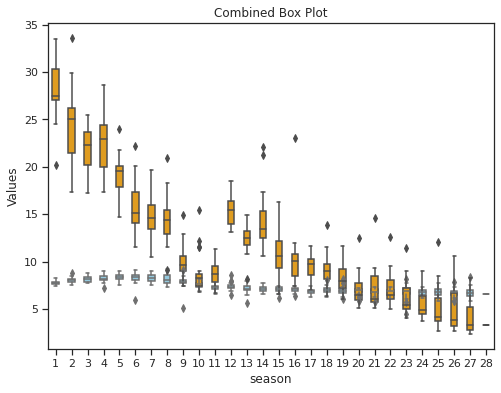

In [45]:
# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='imdb_rating', data=episodes, color='skyblue', width=0.4)
sns.boxplot(x='season', y='us_viewers_in_millions', data=episodes, color='orange', width=0.4)
plt.title('Combined Box Plot')
plt.ylabel('Values')
plt.show()


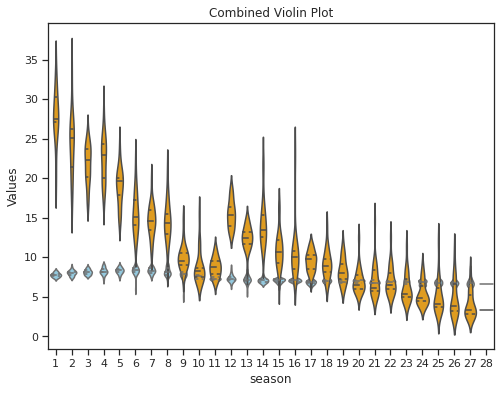

In [46]:
# violinplot
plt.figure(figsize=(8, 6))
sns.violinplot(x='season', y='imdb_rating', data=episodes, color='skyblue', label='IMDb Rating', inner='quartile')
sns.violinplot(x='season', y='us_viewers_in_millions', data=episodes, color='orange', label='US Viewers (Millions)', inner='quartile')
plt.title('Combined Violin Plot')
plt.ylabel('Values')
plt.show()

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


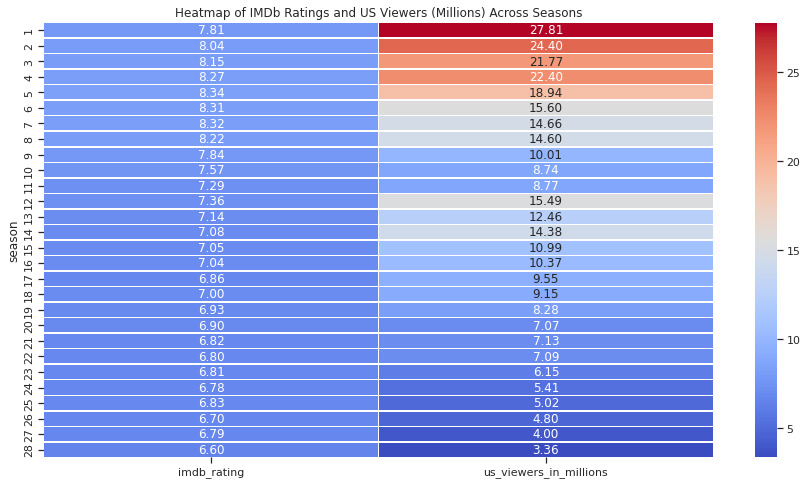

In [62]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
pivot_table = episodes.pivot_table(values=['imdb_rating', 'us_viewers_in_millions'], index='season', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of IMDb Ratings and US Viewers (Millions) Across Seasons')
plt.show()

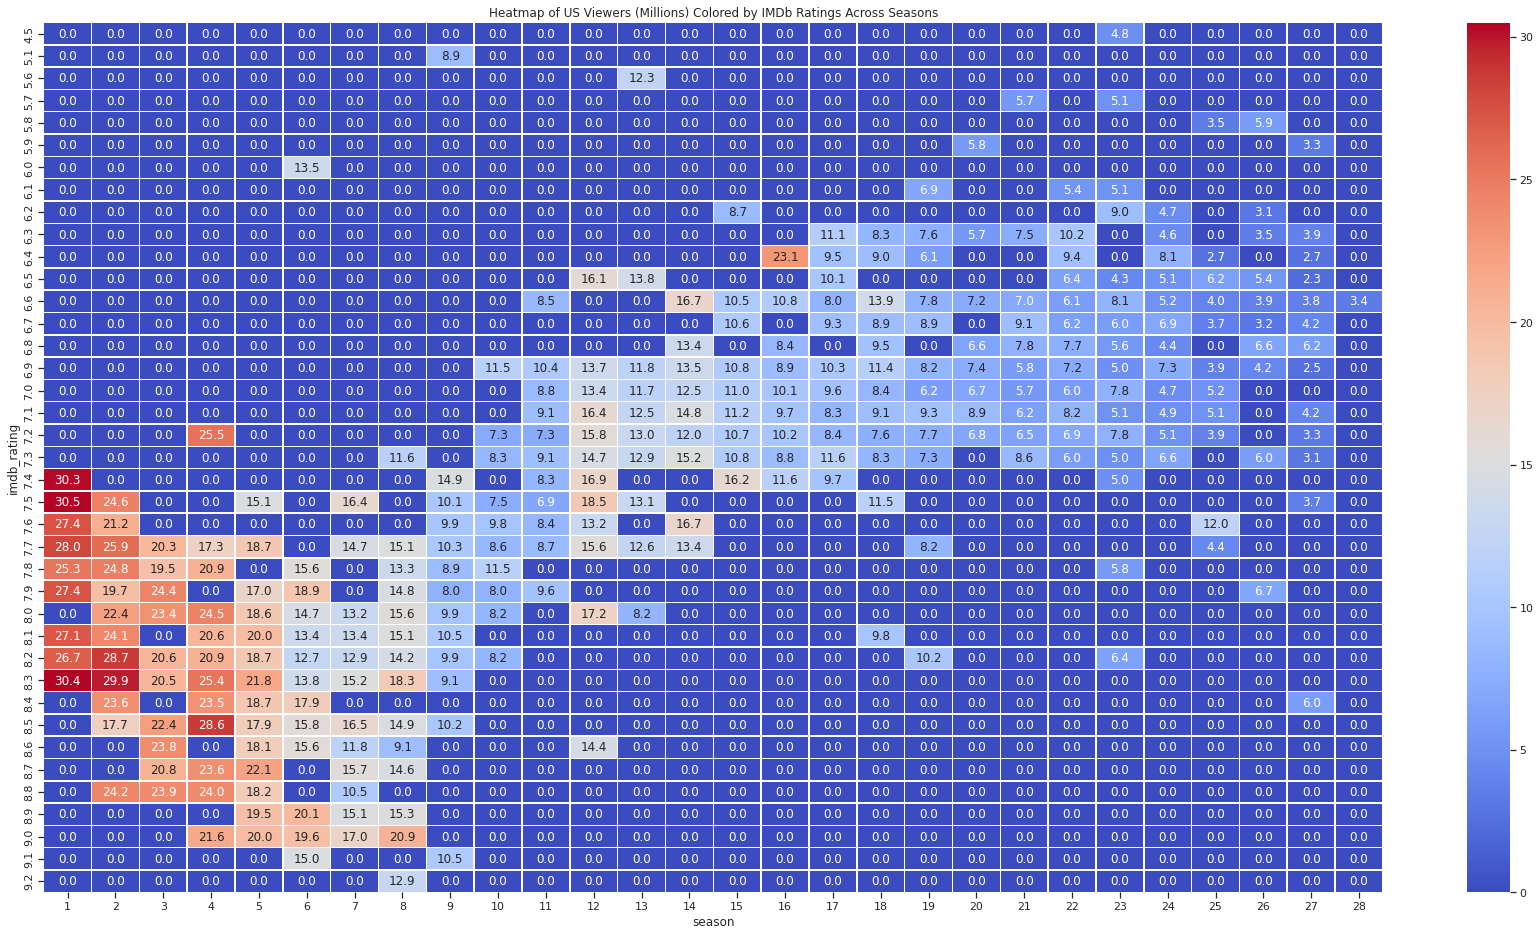

In [63]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu
pivot_table = episodes.pivot_table(values='us_viewers_in_millions', index='imdb_rating', columns='season', aggfunc='mean', fill_value=0)

# Create a heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)
plt.title('Heatmap of US Viewers (Millions) Colored by IMDb Ratings Across Seasons')
plt.show()